In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('placement.csv')

In [4]:
print(df.shape)
df.head()

(100, 3)


,cgpa,resume_score,placed
0,8.14,6.52,1
1,6.17,5.17,0
2,8.27,8.86,1
3,6.88,7.27,1
4,7.52,7.30,1


<Axes: xlabel='cgpa', ylabel='resume_score'>

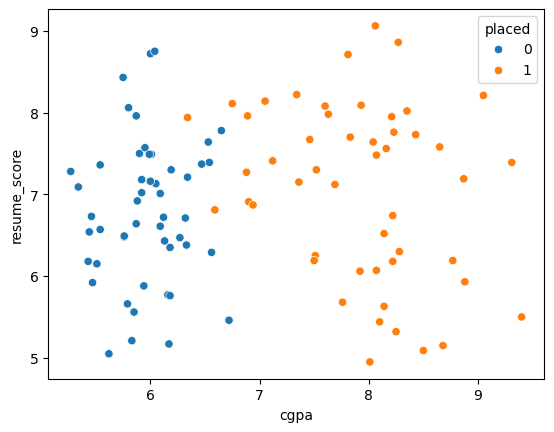

In [5]:
sns.scatterplot(x='cgpa', y='resume_score', hue='placed', data=df)


In [6]:
X = df.iloc[:,0:2]
y = df.iloc[:,-1]

In [7]:
X.head()



,cgpa,resume_score
0,8.14,6.52
1,6.17,5.17
2,8.27,8.86
3,6.88,7.27
4,7.52,7.30


In [8]:
y.head()

0    1
1    0
2    1
3    1
4    1
Name: placed, dtype: int64

In [9]:
from sklearn.linear_model import Perceptron
p = Perceptron()

In [10]:
p.fit(X,y)

Perceptron()

In [11]:
p.coef_

array([[ 40.26, -36.  ]])

In [12]:
p.intercept_

array([-25.])

In [13]:
from mlxtend.plotting import plot_decision_regions

In [14]:
print(X.values)

[[8.14 6.52]
 [6.17 5.17]
 [8.27 8.86]
 [6.88 7.27]
 [7.52 7.3 ]
 [8.77 6.19]
 [5.34 7.09]
 [6.56 6.29]
 [6.32 6.71]
 [7.69 7.12]
 [6.18 6.35]
 [5.44 6.54]
 [6.09 7.01]
 [8.5  5.09]
 [7.51 6.25]
 [8.88 5.93]
 [8.04 7.64]
 [7.81 8.71]
 [5.94 5.88]
 [6.75 8.11]
 [5.8  8.06]
 [6.53 7.64]
 [6.16 5.77]
 [6.05 7.13]
 [8.22 6.18]
 [7.76 5.68]
 [6.27 6.47]
 [5.51 6.15]
 [7.46 7.67]
 [6.19 7.3 ]
 [7.36 7.15]
 [5.92 7.02]
 [5.87 7.96]
 [8.43 7.73]
 [8.87 7.19]
 [8.07 7.48]
 [8.16 7.56]
 [9.05 8.21]
 [6.   8.72]
 [7.5  6.19]
 [8.25 5.32]
 [8.68 5.15]
 [6.9  6.91]
 [8.21 7.95]
 [5.47 5.92]
 [8.1  5.44]
 [5.83 5.21]
 [7.05 8.14]
 [5.54 6.57]
 [5.46 6.73]
 [8.22 6.74]
 [6.54 7.39]
 [5.9  7.5 ]
 [6.   7.16]
 [5.92 7.18]
 [6.94 6.87]
 [6.13 6.43]
 [6.34 7.21]
 [6.47 7.37]
 [5.95 7.57]
 [5.87 6.64]
 [6.89 7.96]
 [5.75 8.43]
 [8.65 7.58]
 [7.93 8.09]
 [6.04 8.75]
 [8.35 8.02]
 [6.59 6.81]
 [6.01 7.49]
 [8.06 9.06]
 [7.12 7.41]
 [7.34 8.22]
 [7.63 7.98]
 [5.76 6.48]
 [5.54 7.36]
 [6.34 7.94]
 [9.4  5.5 ]

d:\Anaconda\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but Perceptron was fitted with feature names
  warnings.warn(


<Axes: >

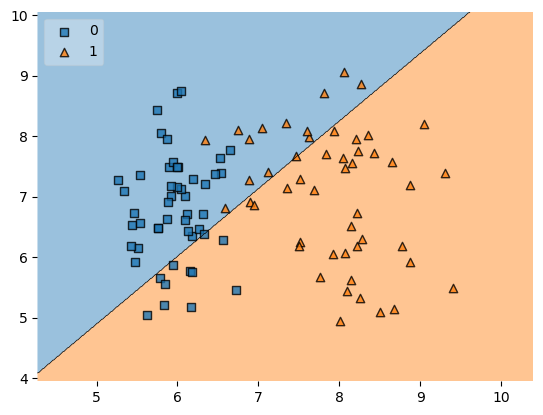

In [15]:
plot_decision_regions(X.values, y.values, clf=p, legend=2)

In [16]:
p.predict([[8.5, 8]])

d:\Anaconda\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but Perceptron was fitted with feature names
  warnings.warn(


array([1], dtype=int64)

In [17]:
from sklearn.datasets import make_classification
import numpy as np
X, y = make_classification(n_samples=100, n_features=2, n_informative=1,n_redundant=0,
                           n_classes=2, n_clusters_per_class=1, random_state=41,hypercube=False,class_sep=10)

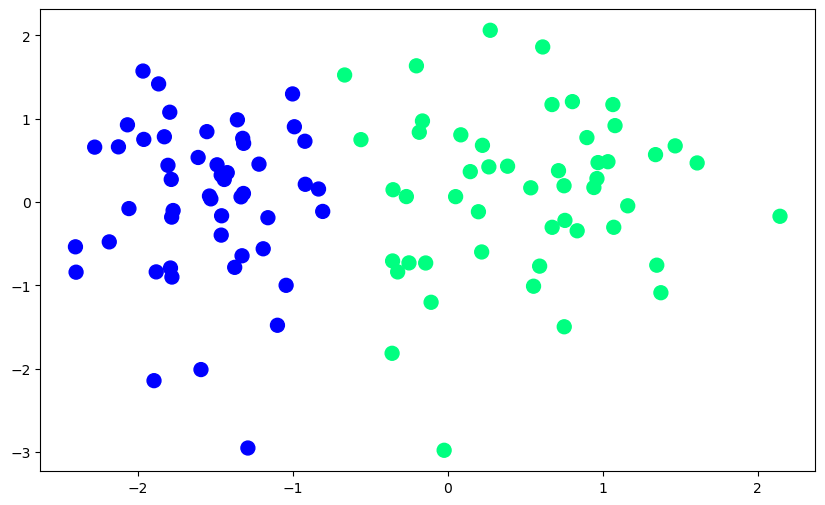

In [18]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
plt.scatter(X[:,0],X[:,1],c=y,cmap='winter',s=100)

In [19]:
def step(z):
    return 1 if z>0 else 0

In [20]:
def perceptron(X,y):
    
    X = np.insert(X,0,1,axis=1)
    weights = np.ones(X.shape[1])
    lr = 0.1
    
    for i in range(1000):
        j = np.random.randint(0,100)
        y_hat = step(np.dot(X[j],weights))
        weights = weights + lr*(y[j]-y_hat)*X[j]
        
    return weights[0],weights[1:]
        

In [21]:
intercept_,coef_ = perceptron(X,y)
print(coef_)
print(intercept_)

[1.41660373 0.08314884]
1.0


In [22]:
m = -(coef_[0]/coef_[1])
b = -(intercept_/coef_[1])
x_input = np.linspace(-3,3,100)
y_input = m*x_input + b

(-3.0, 2.0)

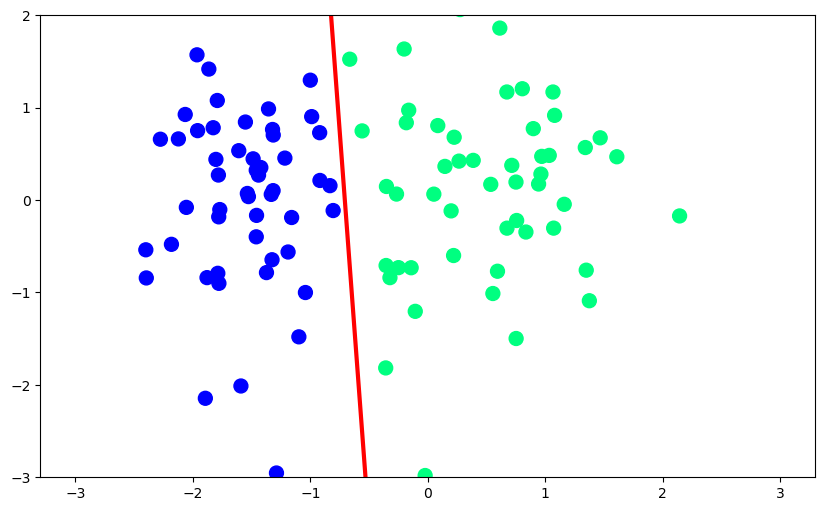

In [23]:
plt.figure(figsize=(10,6))
plt.plot(x_input,y_input,color='red',linewidth=3)
plt.scatter(X[:,0],X[:,1],c=y,cmap='winter',s=100)
plt.ylim(-3,2)

## Hinge-loss

In [39]:
from sklearn.datasets import make_classification
import numpy as np
X, y = make_classification(n_samples=100, n_features=2, n_informative=1,n_redundant=0,
                           n_classes=2, n_clusters_per_class=1, random_state=41,hypercube=False,class_sep=15)

In [40]:
X.shape

(100, 2)

In [42]:
y.shape

(100,)

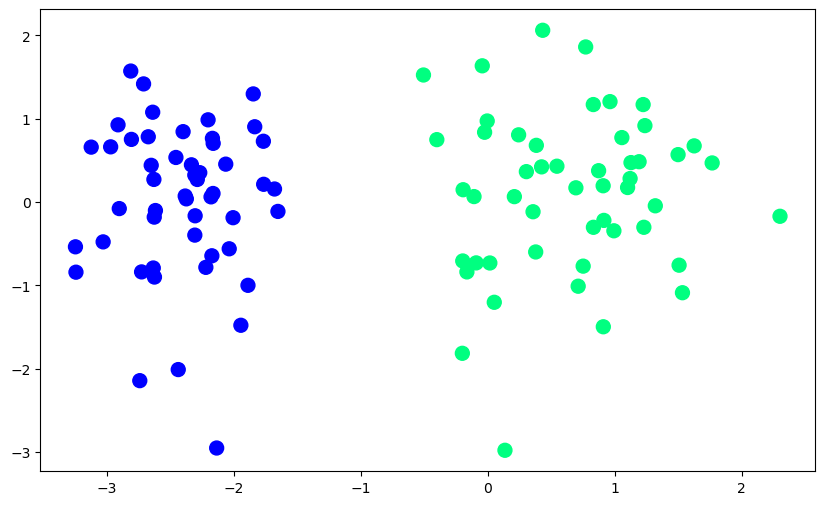

In [43]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
plt.scatter(X[:,0],X[:,1],c=y,cmap='winter',s=100)

In [44]:
def perceptronLoss(X,y):
    
    w1=w2=b=1
    lr = 0.1
    
    for j in range(1000):
    
        for i in range(X.shape[0]):

            # check condition
            z = w1*X[i][0] + w2*X[i][1] + b

            if z*y[i] < 0:
                w1 = w1 + lr*y[i]*X[i][0]
                w2 = w2 + lr*y[i]*X[i][1]
                b = b + lr*y[i]
            
    return w1,w2,b
            

In [45]:
w1,w2,b = perceptronLoss(X,y)

In [46]:
b


1.3000000000000003

In [47]:
m = -(w1/w2)
c = -(b/w2)

print(m,c)

-4.531321834268464 -5.851870329508209


(-3.0, 2.0)

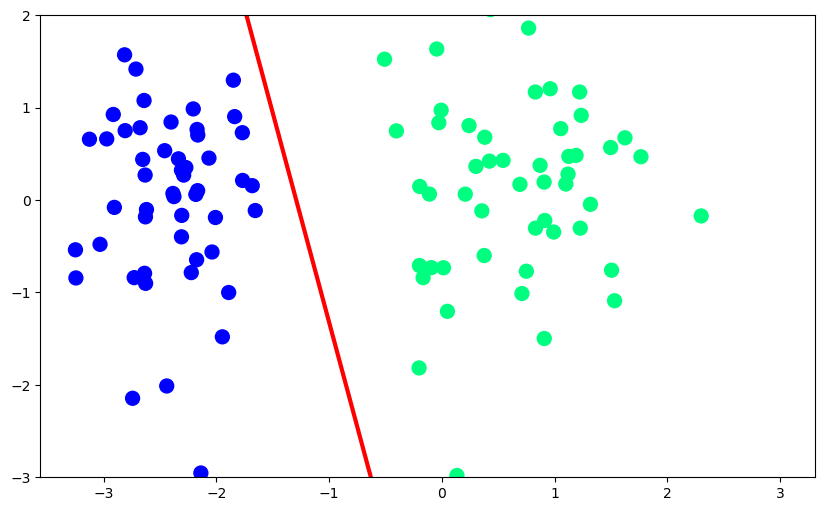

In [48]:
x_input = np.linspace(-3,3,100)
y_input = m*x_input + c

plt.figure(figsize=(10,6))
plt.plot(x_input,y_input,color='red',linewidth=3)
plt.scatter(X[:,0],X[:,1],c=y,cmap='winter',s=100)
plt.ylim(-3,2)